<table align="center">
   <td align="center"><a target="_blank" href="https://colab.research.google.com/github/umbcdata602/fall2020/blob/master/lab_svm.ipynb">
<img src="http://introtodeeplearning.com/images/colab/colab.png?v2.0"  style="padding-bottom:5px;" />Run in Google Colab</a></td>
</table>

# Lab -- SVM

Classification with Iris dataset -- Linear and and RBF kernels

### References

* Raschka's [ch03.ipyb](https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/ch03/ch03.ipynb) -- github
* [sklearn.svm.SVC API docs](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) -- scikit-learn.org


In [1]:
# Raschka's Cell 3, 4, 6, and part of 12
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print('Class labels:', np.unique(y))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

Class labels: [0 1 2]


In [2]:
# Cell 11 -- convenience function for plotting decision boundary/region
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c=[(0, 0, 0, 0)], # change suppresses matplotlib warning
                    edgecolor='black',
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')


<img src="https://github.com/rasbt/python-machine-learning-book-3rd-edition/raw/master/ch03/images/03_09.png" width="600"/>

<img src="https://github.com/rasbt/python-machine-learning-book-3rd-edition/raw/master/ch03/images/03_10.png" width="600"/>

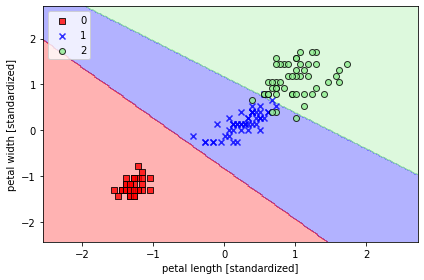

In [3]:
# Raschka's Cell 28 & 29 (combined: 28 is linear SVC, 29 uses RBF kernel)
# Also combines Logistic Regression from Rascka's Cell 18
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
 
#clf = LogisticRegression(C=100000000, random_state=1, solver='lbfgs', multi_class='ovr', intercept_scaling=1000000.)

clf = SVC(kernel='linear', C=100., random_state=1) # Cell 28 uses C=1.0
clf = SVC(kernel='rbf', gamma=.0003, C=1., random_state=1) # Cell 29 adds gamma=.3

clf.fit(X_combined_std, y_combined)

plot_decision_regions(X_combined_std, 
                      y_combined,
                      classifier=clf)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout();

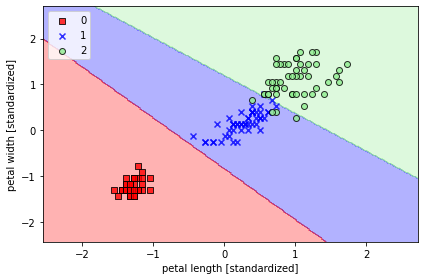

In [4]:
# Raschka's Cell 28 & 29 (combined: 28 is linear SVC, 29 uses RBF kernel)
# Also combines Logistic Regression from Rascka's Cell 18
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
 
#clf = LogisticRegression(C=100000000, random_state=1, solver='lbfgs', multi_class='ovr', intercept_scaling=1000000.)

clf = SVC(kernel='linear', C=0.0001, random_state=1) # Cell 28 uses C=1.0
#clf = SVC(kernel='rbf', gamma=.3, C=1.0, random_state=1) # Cell 29 adds gamma=.3

clf.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, 
                      y_combined,
                      classifier=clf)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout();

In [5]:
clf.coef_

array([[-0.00549917, -0.00495569],
       [-0.00815952, -0.00818083],
       [-0.00266035, -0.00322513]])

In [6]:
clf.intercept_

array([-0.00418054,  0.00098847,  0.0038592 ])